In [193]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [198]:
from google.colab import files
uploaded=files.upload()

Saving Bank_attrition_Data.xlsx to Bank_attrition_Data (3).xlsx


In [199]:
df=pd.read_excel("Bank_attrition_Data (3).xlsx")

In [200]:
df.head()

,Row Number,Customer ID,First Name,State,Gender,Age,Salary,Credit Score,Tenure,Balance,...,IsActiveMember,Exited,Complain,Count of Complains,Satisfaction Score,Point Earned,Preferred Channel,region,employment_type,residential_status
0,1,TN00001,Sunita,Tamil Nadu,Female,45,67000.0,688,1,179937.42,...,1,0,1,19,5.0,12,Email,Southern,Self-Employed,Living with family
1,2,MH00002,Nitya,Maharashtra,Female,77,33000.0,538,4,0.00,...,0,1,0,0,5.0,100,Mobile,Western,Salaried,Rent
2,3,KA00003,Vivaan,Karnataka,Male,78,190000.0,531,8,15585.55,...,1,1,0,0,10.0,150,Mobile,Southern,Salaried,Own
3,4,MH00004,Dinesh,Maharashtra,Male,42,330000.0,718,3,155688.22,...,1,0,0,0,10.0,150,Phone,Western,Self-Employed,Rent
4,5,KA00005,Charvi,Karnataka,Female,29,155000.0,710,7,89415.53,...,1,0,0,0,4.0,90,Branch,Not Available,Unknown,Unknown


In [201]:
df.columns

Index(['Row Number', 'Customer ID', 'First Name', 'State', 'Gender', 'Age',
       'Salary', 'Credit Score', 'Tenure', 'Balance', 'HasCrCard', 'Card Type',
       'HasLoan', 'HasFD', 'Num Of Products', 'IsActiveMember', 'Exited',
       'Complain', 'Count of Complains', 'Satisfaction Score', 'Point Earned',
       'Preferred Channel', 'region', 'employment_type', 'residential_status'],
      dtype='object')

In [202]:
# standardize column names
df.columns = (
    df.columns
      .str.lower()
      .str.replace(' ', '_')
)


In [203]:
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel', 'region', 'employment_type', 'residential_status'],
      dtype='object')

In [204]:
df.isnull().sum()

,0
row_number,0
customer_id,0
first_name,0
state,0
gender,6
age,0
salary,9
credit_score,0
tenure,0
balance,8


In [208]:
# fill na
df.dropna(subset=['gender'])
# salary
df['salary']=df['salary'].fillna(df['salary'].median())
# balance
df['balance']=df['balance'].fillna(0)
# satisfaction_score
df['satisfaction_score']=df['satisfaction_score'].fillna(df['satisfaction_score'].median())
# card_type
df['card_type']=df['card_type'].fillna(df['card_type'].mode()[0])

In [209]:
df.isnull().sum()

,0
row_number,0
customer_id,0
first_name,0
state,0
gender,6
age,0
salary,0
credit_score,0
tenure,0
balance,0


In [210]:
df['card_type']=df['card_type'].str.upper().str.strip()

In [211]:
# numeric columns
numeric_columns=df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['row_number', 'age', 'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited', 'complain', 'count_of_complains', 'satisfaction_score', 'point_earned']


In [212]:
from textwrap import indent
# unique values in each numeric columns
unique_counts={col:df[col].nunique() for col in numeric_columns}
print(unique_counts)

{'row_number': 15000, 'age': 56, 'salary': 194, 'credit_score': 435, 'tenure': 10, 'balance': 12665, 'hascrcard': 2, 'hasloan': 2, 'hasfd': 2, 'num_of_products': 4, 'isactivemember': 2, 'exited': 2, 'complain': 2, 'count_of_complains': 31, 'satisfaction_score': 10, 'point_earned': 74}


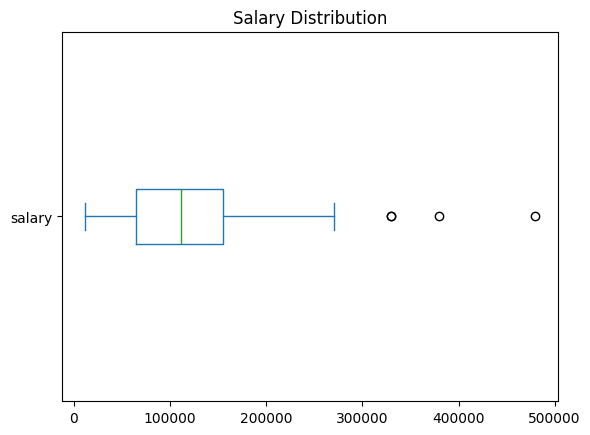

In [213]:
# outlier in salary
df['salary'].plot(kind='box',vert=False)
plt.title('Salary Distribution')
plt.show()

In [214]:
# remove outliers
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#outliers
salary_outliers=df[(df['salary']<lower_bound) | (df['salary']>upper_bound)]
print("Outliers Customers Based on Salary")
print(salary_outliers['salary'])
print()

Outliers_count=((df['salary']<lower_bound) | (df['salary']>upper_bound)).sum()
print("COunt of Outliers based on salary:",Outliers_count)

Outliers Customers Based on Salary
3     330000.0
37    480000.0
47    330000.0
60    380000.0
Name: salary, dtype: float64

COunt of Outliers based on salary: 4


In [215]:
# capping the outliers
df['salary']=np.where(df['salary']>upper_bound,upper_bound,df['salary'])
df['salary']=np.where(df['salary']<lower_bound,lower_bound,df['salary'])

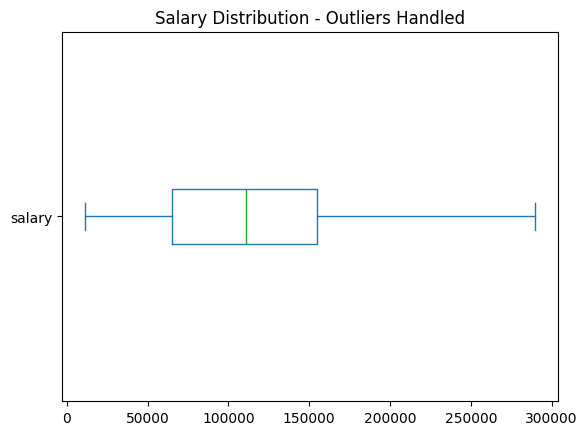

In [216]:
# salary distribution -Outliers Handled
df['salary'].plot(kind='box',vert=False)
plt.title("Salary Distribution - Outliers Handled")
plt.show()

In [217]:
# mean,median
print("Salary - mean,median,mode")
mean_salary=round(np.mean(df['salary']))
print("mean:",mean_salary)
median_salary=round(np.median(df['salary']))
print("median:",median_salary)
print()

print("Balance - mean,median,mode")
mean_balance=round(np.mean(df['balance']))
print("mean:",mean_balance)
median_balance=round(np.median(df['balance']))
print("median:",median_balance)
print()

print("Credit Score - mean,median,mode")
mean_credit_score=round(np.mean(df['credit_score']))
print("mean:",mean_credit_score)
median_credit_score=round(np.median(df['credit_score']))
print("median:",median_credit_score)
print()

Salary - mean,median,mode
mean: 110157
median: 111000

Balance - mean,median,mode
mean: 96977
median: 84097

Credit Score - mean,median,mode
mean: 670
median: 683



In [218]:
# count of category
gender_count=df['gender'].value_counts()
print("Gender Count:",gender_count)

card_type_count=df['card_type'].value_counts()
print("\nCard Type Count:",card_type_count)


df['loan_status']=df['hasloan'].map({0:"No Loan",1:"Has Loan"})
loan_status_count=df['loan_status'].value_counts()
print("\nLoan Status Count:",loan_status_count)

df['fd_status']=df['hasfd'].map({0:"No FD",1:"Has FD"})
FD_status_count=df['fd_status'].value_counts()
print("\nFD Status Count:",FD_status_count)

Gender Count: gender
Male      9028
Female    5966
Name: count, dtype: int64

Card Type Count: card_type
SILVER            4367
GOLD              4036
PLATINUM          3400
NOT APPLICABLE    3197
Name: count, dtype: int64

Loan Status Count: loan_status
No Loan     11525
Has Loan     3475
Name: count, dtype: int64

FD Status Count: fd_status
No FD     8359
Has FD    6641
Name: count, dtype: int64


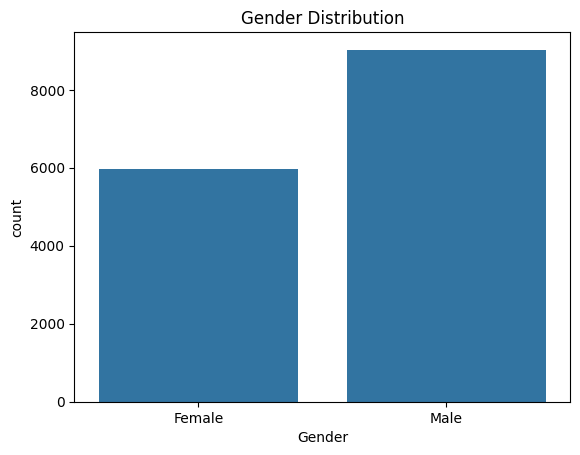

In [219]:
# Gender Distribution
sns.countplot(data=df,x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.show()

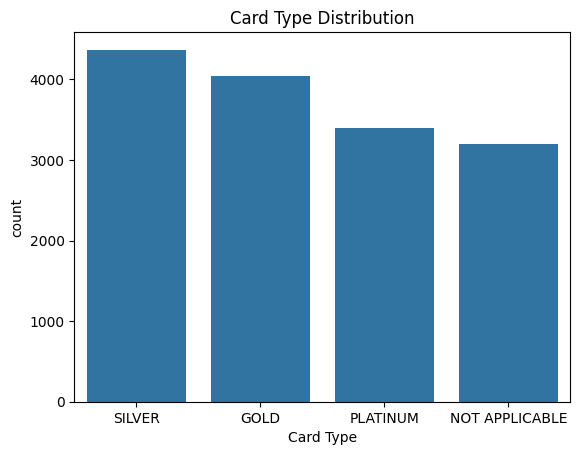

In [220]:
# card type distribution
sns.countplot(data=df,x='card_type')
plt.title("Card Type Distribution")
plt.xlabel("Card Type")
plt.show()

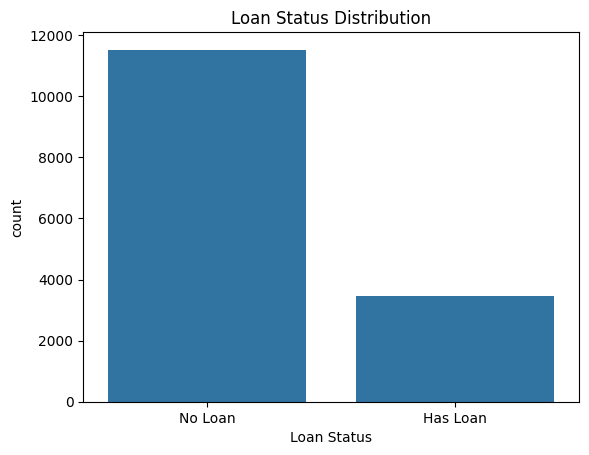

In [221]:
# Loan Status Distribution
sns.countplot(data=df,x='loan_status')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.show()

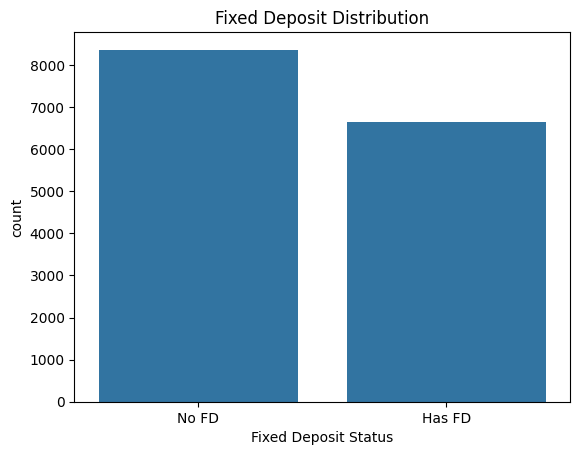

In [222]:
# Fixed Deposit Distribution
sns.countplot(data=df,x='fd_status')
plt.title("Fixed Deposit Distribution")
plt.xlabel("Fixed Deposit Status")
plt.show()

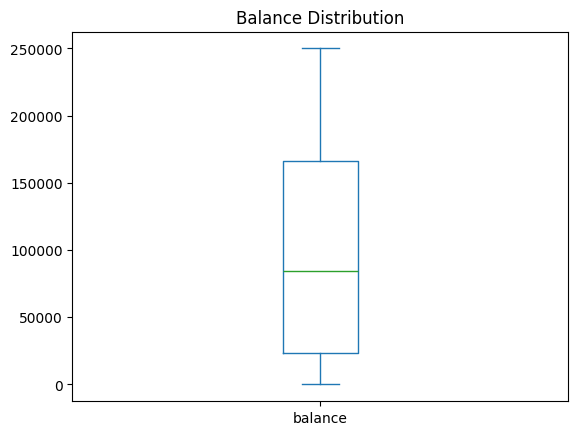

In [223]:
# Balance distribution outliers check
df['balance'].plot(kind='box')
plt.title("Balance Distribution")
plt.show()

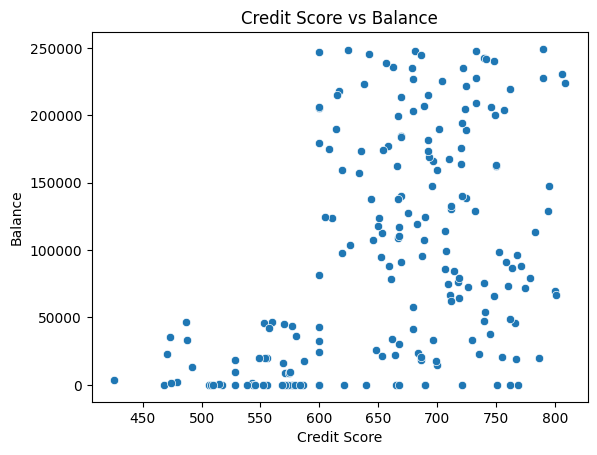

In [224]:
# check relationship b/w credit score and balance
df_sample=df.sample(n=200,random_state=42)
sns.scatterplot(data=df_sample,x='credit_score',y='balance')
plt.xlabel("Credit Score")
plt.ylabel("Balance")
plt.title("Credit Score vs Balance")
plt.show()

In [225]:
# Debt to Income Ration
# (Balance + (HasLoan * salary * 0.3))/salary

df['debt_to_income_ratio']=(df['balance']+(df['hasloan']*df['salary']*0.3))/df['salary']

df[['first_name','debt_to_income_ratio']].head()

,first_name,debt_to_income_ratio
0,Sunita,2.685633
1,Nitya,0.000000
2,Vivaan,0.082029
3,Dinesh,0.536856
4,Charvi,0.576874


In [226]:
# Loyalty score calculation
# (Tenure * satisfaction score)/(1 + count of complains)
df['loyalty_score']=(df['tenure']*df['satisfaction_score'])/(1 + df['count_of_complains'])
df[['first_name','loyalty_score']].head()

,first_name,loyalty_score
0,Sunita,0.25
1,Nitya,20.00
2,Vivaan,80.00
3,Dinesh,30.00
4,Charvi,28.00


In [227]:
# Average number of complaints per state
df['state_avg_complains']=df.groupby("state")['count_of_complains'].transform('mean')

In [228]:
# compare individual complaint count  to their state's average
df['above_state_avg_complains']=df['state_avg_complains']<df['count_of_complains']
df['high_complainer']=df['above_state_avg_complains'].astype(int) # convert it into 1 if true else 0

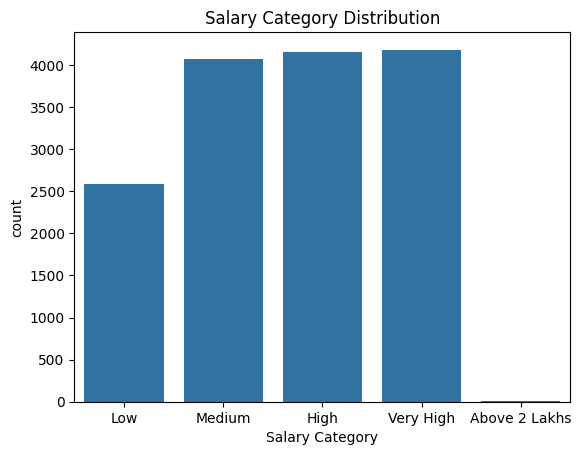

In [229]:
# categorize customers by salary
df['salary_category']=np.where(
    df['salary']<=50000,'Low',
    np.where(
        df['salary']<=100000,'Medium',
        np.where(
            df['salary']<=150000,'High',
            np.where(
                df['salary']<=200000,'Very High',
                'Above 2 Lakhs'
            )
        )
    )
)

sns.countplot(data=df.sort_values('salary'),x='salary_category')
plt.title("Salary Category Distribution")
plt.xlabel("Salary Category")
plt.show()

In [230]:


# Average Number of Products Based on Customer Tenure
tenure_product_analysis=df.groupby('tenure')['num_of_products'].mean()
print("Average Number of Products Based on Customer Tenure:")
print(tenure_product_analysis)

Average Number of Products Based on Customer Tenure:
tenure
1     1.433856
2     1.444630
3     1.438215
4     1.476880
5     1.495968
6     1.490417
7     1.368132
8     1.481707
9     1.510769
10    1.514377
Name: num_of_products, dtype: float64


In [231]:

# Grouping by churn status  to analyze salary and product usage
churn_analysis=df.groupby('exited')[['salary','num_of_products']].mean()
print("Grouping by churn status  to analyze salary and product usage:")
print(churn_analysis)

Grouping by churn status  to analyze salary and product usage:
               salary  num_of_products
exited                                
0       115267.351333         1.509690
1        89068.010936         1.260766


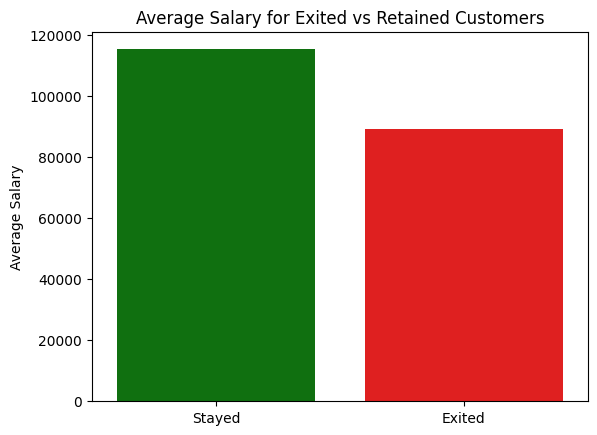

In [314]:
# compare Average salary for exited vs retained customer
sns.barplot(data=df.replace({'exited':{1:'Exited',0:'Stayed'}}),x='exited',y='salary',hue='exited',palette=['green','red'],errorbar=None)
plt.title("Average Salary for Exited vs Retained Customers")
plt.xlabel("")
plt.ylabel("Average Salary")
plt.show()



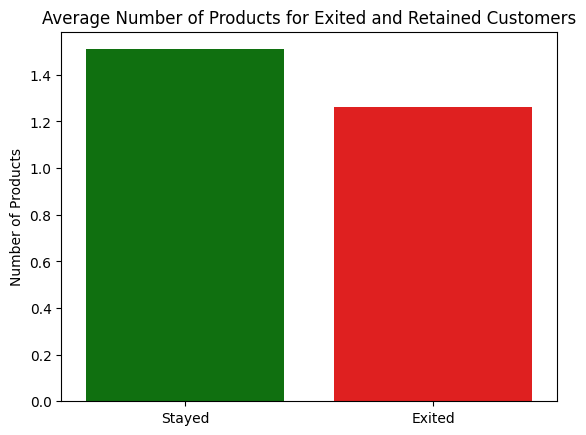

In [315]:
# compare Average number of products for exited and retained customer
sns.barplot(data=df.replace({'exited':{
    0:'Stayed',
    1:'Exited'
}}),x='exited',y='num_of_products',palette=['green','red'],hue='exited',errorbar=None)
plt.xlabel('')
plt.ylabel('Number of Products')
plt.title('Average Number of Products for Exited and Retained Customers')
plt.show()

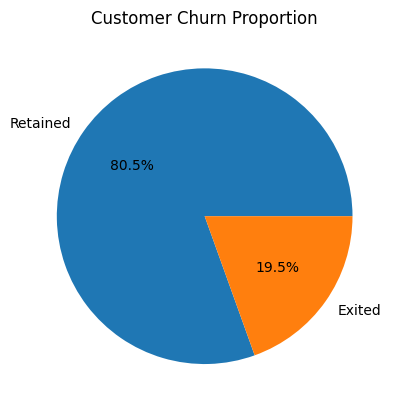

In [234]:
# visualization of customer churn vs retention proportion
churn_counts=df['exited'].value_counts()
labels=['Retained','Exited']
plt.pie(churn_counts,labels=labels,autopct='%1.1f%%')
plt.title('Customer Churn Proportion')
plt.show()

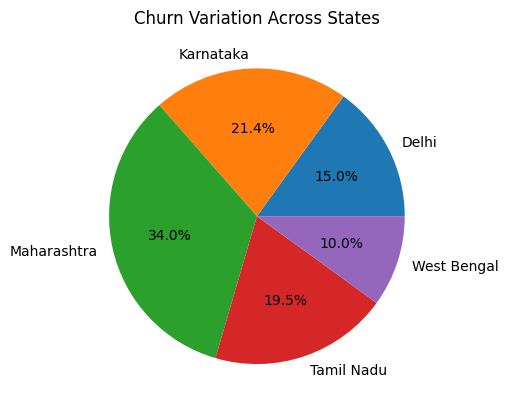

In [263]:
# churn variation across states
region_churn_count=df.groupby(df['state'])['exited'].sum()
plt.pie(region_churn_count,labels=region_churn_count.index,autopct='%1.1f%%')
plt.title('Churn Variation Across States')
plt.show()

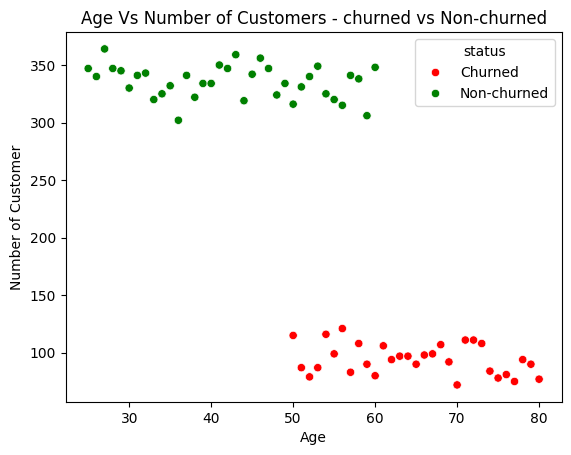

In [238]:
# Age vs Number of Customers(churned vs Non churned)
churned_count=df[df['exited']==1].groupby('age').size().reset_index(name='count')
non_churned_count=df[df['exited']==0].groupby('age').size().reset_index(name='count')

churned_count['status']='Churned'
non_churned_count['status']='Non-churned'

combined_df=pd.concat([churned_count,non_churned_count])
sns.scatterplot(data=combined_df,x='age',y='count',hue='status',palette={'Churned':'red','Non-churned':'green'})
plt.title('Age Vs Number of Customers - churned vs Non-churned')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

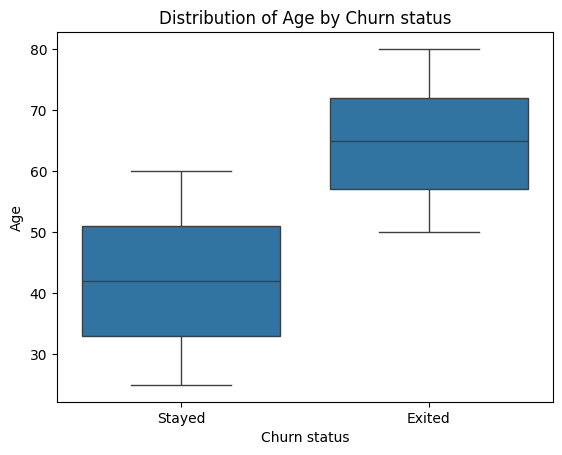

In [239]:
# Distribution of age by churn status
sns.boxplot(data=df.replace({0:'Stayed',1:'Exited'}),x='exited',y='age')
plt.title('Distribution of Age by Churn status')
plt.xlabel('Churn status')
plt.ylabel('Age')
plt.show()


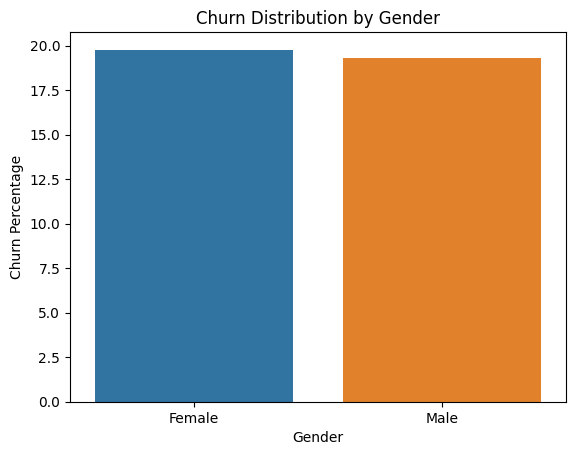

In [240]:
# churn distribution by gender -> who exited male or female?
churn_counts = df[df['exited']==1].groupby('gender').size().reset_index(name='churned_count')
total_counts = df.groupby('gender').size().reset_index(name='total_count')

merged_counts = pd.merge(churn_counts, total_counts, on='gender')
merged_counts['churn_percentage'] = (merged_counts['churned_count'] / merged_counts['total_count']) * 100

sns.barplot(data=merged_counts, x='gender', y='churn_percentage', hue='gender')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.show()

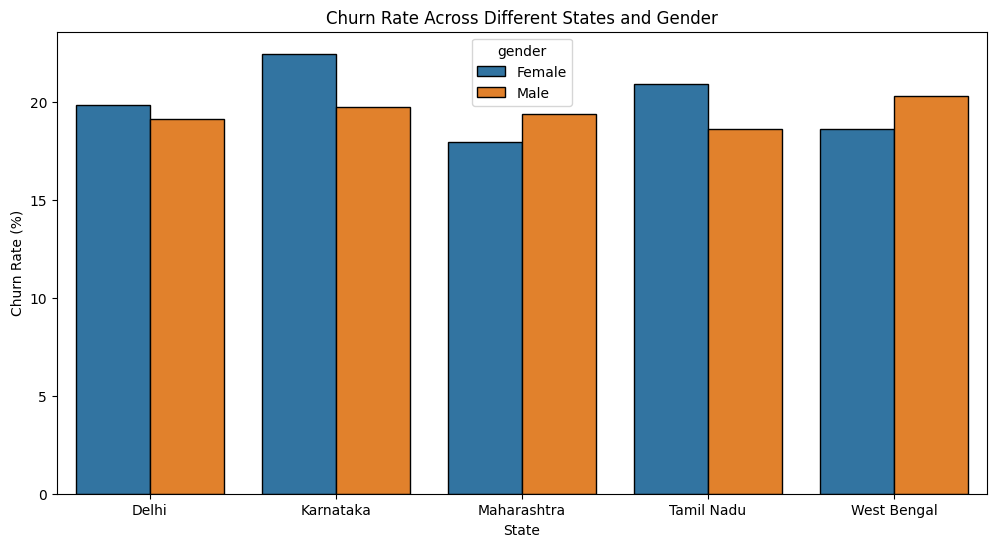

In [241]:
# Analyze customer churn rates across different states and genders
churned_customers = df[df['exited'] == 1].groupby(['state', 'gender']).size().reset_index(name='churned_count')
total_customer = df.groupby(['state', 'gender']).size().reset_index(name='total_count')

merged_churn_data = pd.merge(churned_customers, total_customer, on=['state', 'gender'])
merged_churn_data['churn_rate'] = (merged_churn_data['churned_count'] / merged_churn_data['total_count']) * 100


plt.figure(figsize=(12, 6))
sns.barplot(data=merged_churn_data, x='state', y='churn_rate', hue='gender',edgecolor='black')
plt.title('Churn Rate Across Different States and Gender')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()

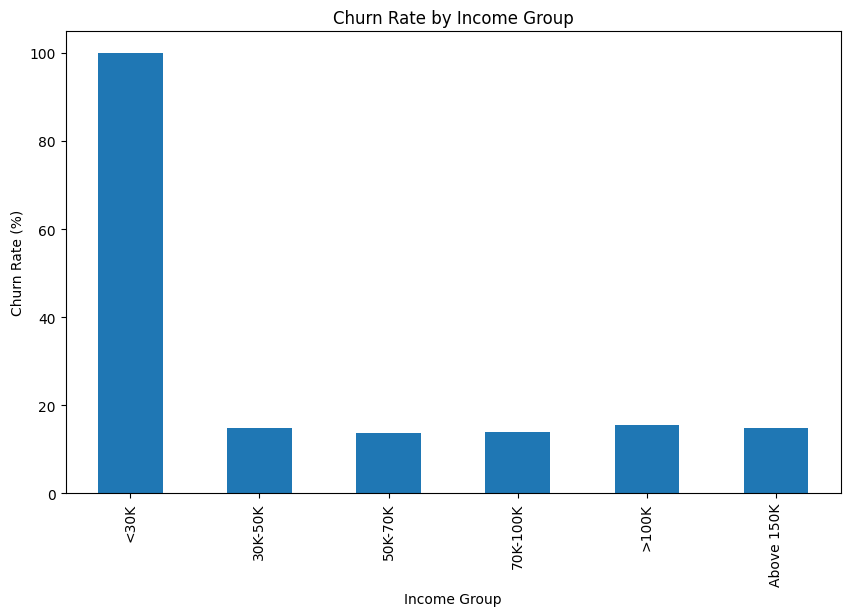

In [255]:
# relationship b/w Income Group - Salary and churn rate
#income ranges
bins = [0, 30000, 50000, 70000, 100000, 150000, df['salary'].max()]
labels = ['<30K', '30K-50K', '50K-70K', '70K-100K', '>100K', 'Above 150K']

df['income_group'] = pd.cut(df['salary'], bins=bins, labels=labels)

# total customers in each income group
total_customers_by_income = df.groupby('income_group',observed=True)['exited'].count()

#churned customers in each income group
churned_customers_by_income = df.groupby('income_group',observed=True)['exited'].sum()

#churn rate by income group
churn_rate_by_income = (churned_customers_by_income / total_customers_by_income) * 100

plt.figure(figsize=(10, 6))
churn_rate_by_income.plot(kind='bar')
plt.title('Churn Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Churn Rate (%)')
plt.show()

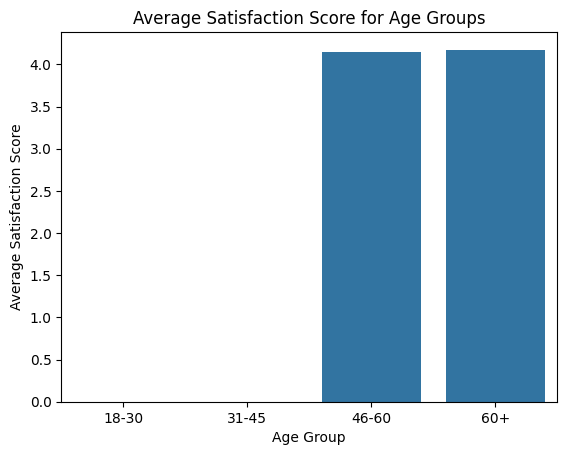

In [258]:
# average satisfaction score for age groups
age_bins=[18,30,45,60,100]
age_labels=['18-30','31-45','46-60','60+']

df['age_group']=pd.cut(df['age'],bins=age_bins,labels=age_labels)

churned_customer=df[df['exited']==1]
avg_satisfaction_churned=churned_customer.groupby('age_group',observed=True)['satisfaction_score'].mean().reset_index(name='avg_satisfaction_score')
sns.barplot(data=avg_satisfaction_churned,x='age_group',y='avg_satisfaction_score')
plt.title('Average Satisfaction Score for Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Score')
plt.show()

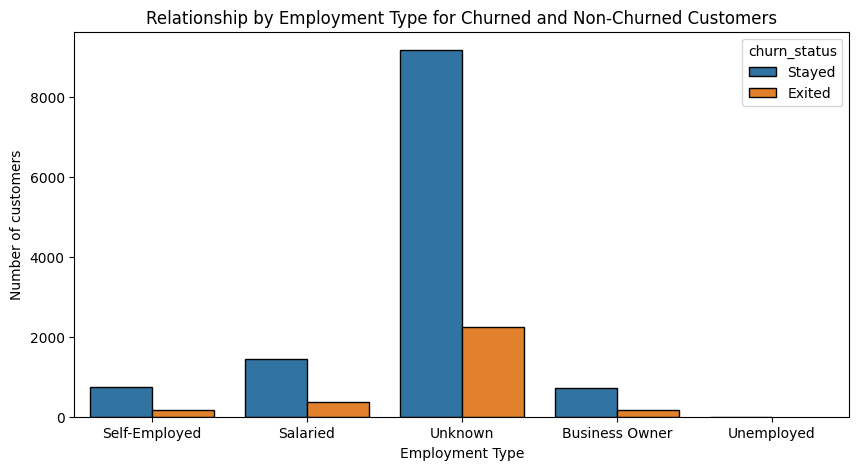

In [265]:
 # relationship by employment type for churned and non-churned customers
plt.figure(figsize=(10,5))
df_plot = df.copy()
df_plot['churn_status'] = df_plot['exited'].replace({0:"Stayed",1:"Exited"})

sns.countplot(data=df_plot, x='employment_type', hue='churn_status', edgecolor='black')
plt.title('Relationship by Employment Type for Churned and Non-Churned Customers')
plt.xlabel('Employment Type')
plt.ylabel('Number of customers')
plt.show()

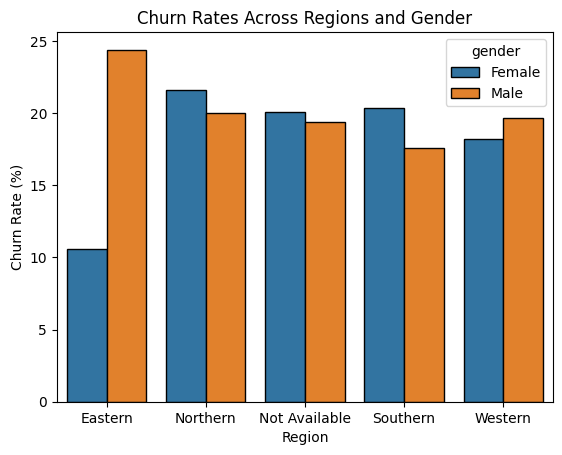

In [262]:
# churn rates across regions and genders
grouped_data=df.groupby(['region','gender'])
churned_customer=grouped_data['exited'].sum()
total_customer=grouped_data['exited'].count()

churn_rate_region_gender=(churned_customer/total_customer)* 100
#convert it into dataframe
churn_rate_region_gender = churn_rate_region_gender.reset_index(name='churn_rate')

sns.barplot(data=churn_rate_region_gender,x='region',y='churn_rate',hue='gender',edgecolor='black')
plt.title('Churn Rates Across Regions and Gender')
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.show()

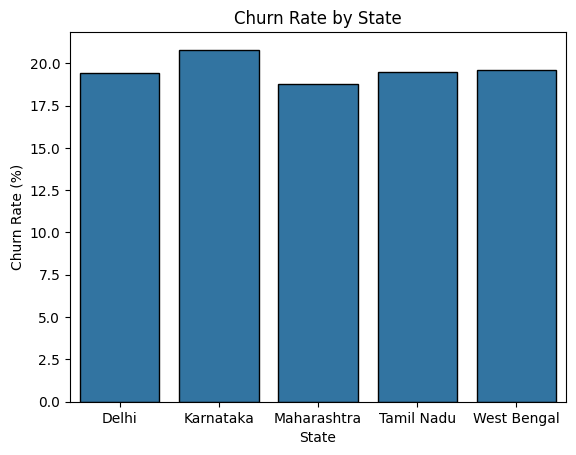

In [266]:
# churn rate by state
grouped_data=df.groupby('state')
churned_customer=grouped_data['exited'].sum()
total_customer=grouped_data['exited'].count()
churn_rate_state=(churned_customer/total_customer)*100
churn_rate_state=churn_rate_state.reset_index(name='churn_rate')

sns.barplot(data=churn_rate_state,x='state',y='churn_rate',edgecolor='black')
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()


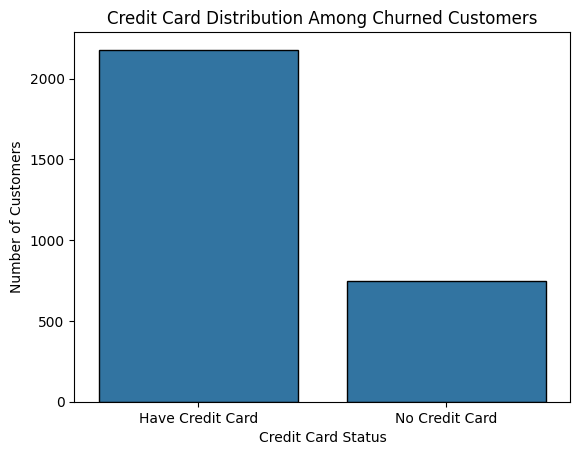

In [269]:
# credit card distribution among churned customers
churned_customers = df[df['exited'] == 1].copy()
churned_customers['credit_card_status'] = churned_customers['hascrcard'].replace({0:"No Credit Card", 1:"Have Credit Card"})

sns.countplot(data=churned_customers, x='credit_card_status', edgecolor='black')
plt.title('Credit Card Distribution Among Churned Customers')
plt.xlabel('Credit Card Status')
plt.ylabel('Number of Customers')
plt.show()


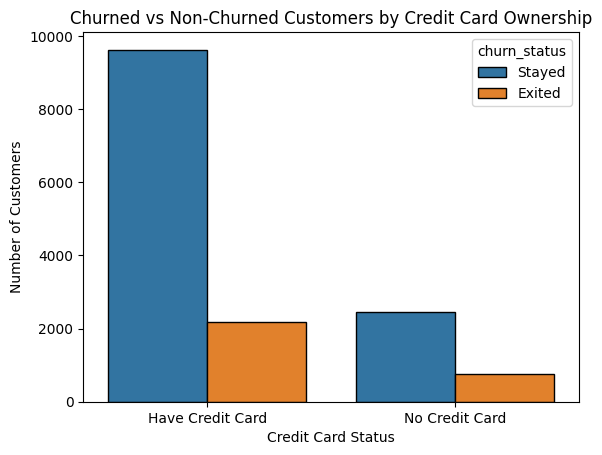

In [271]:
# churned vs non-churned customers credit card relationship
overall_customers = df.copy()
overall_customers['credit_card_status'] = overall_customers['hascrcard'].replace({0: "No Credit Card", 1: "Have Credit Card"})
overall_customers['churn_status'] = overall_customers['exited'].replace({0: "Stayed", 1: "Exited"})

sns.countplot(
    data=overall_customers,
    x='credit_card_status',
    hue='churn_status',
    edgecolor='black'
)
plt.title('Churned vs Non-Churned Customers by Credit Card Ownership')
plt.xlabel('Credit Card Status')
plt.ylabel('Number of Customers')
plt.show()


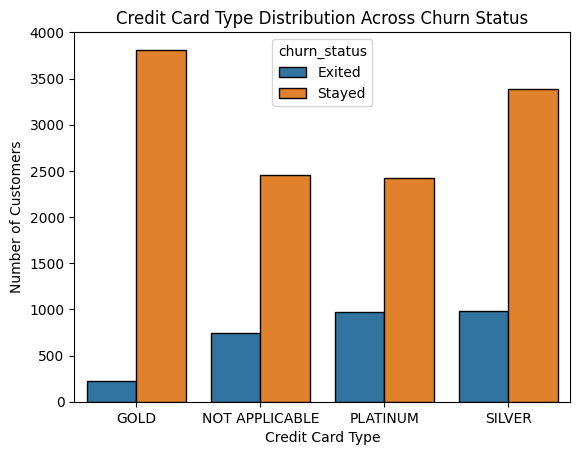

In [275]:
# credit card type distribution across churn status
overall_customers = df.copy()
overall_customers['churn_status'] = overall_customers['exited'].replace({0: "Stayed", 1: "Exited"})
card_type_customer_distribution=overall_customers.groupby(['card_type','churn_status']).size().reset_index(name='count')

sns.barplot(data=card_type_customer_distribution,x='card_type',y='count',hue='churn_status',edgecolor='black')
plt.title('Credit Card Type Distribution Across Churn Status')
plt.xlabel('Credit Card Type')
plt.ylabel('Number of Customers')
plt.show()

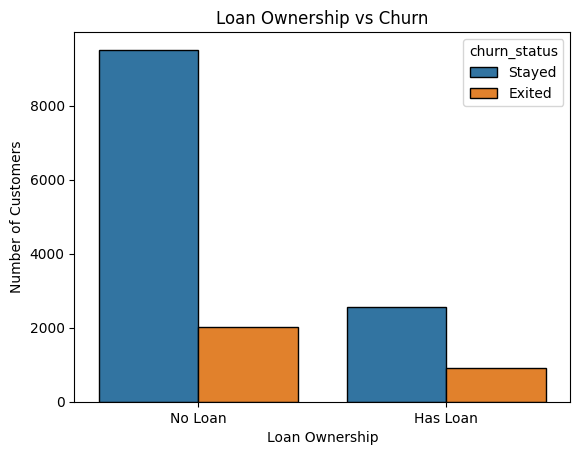

In [279]:
# loan ownership vs churn
overall_customers = df.copy()
overall_customers['churn_status'] = overall_customers['exited'].replace({0: "Stayed", 1: "Exited"})
overall_customers['hasloan'] = overall_customers['hasloan'].replace({0: "No Loan", 1: "Has Loan"})
sns.countplot(data=overall_customers,x='hasloan',hue='churn_status',edgecolor='black')
plt.title('Loan Ownership vs Churn')
plt.xlabel('Loan Ownership')
plt.ylabel('Number of Customers')
plt.show()

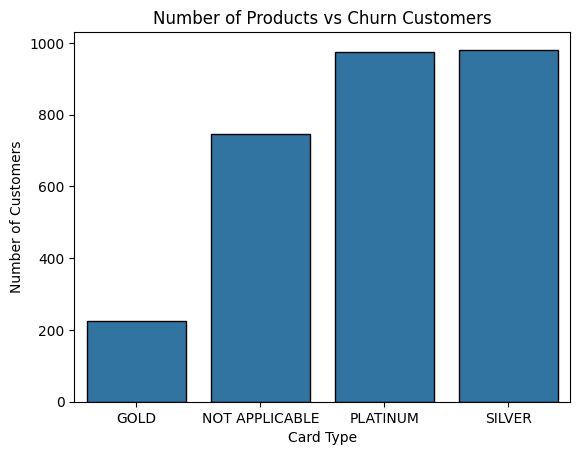

In [282]:
# number of products vs churn customers relationship
exited_customers=df[df['exited']==1]
card_type_churned=exited_customers.groupby('card_type',observed=True).size().reset_index(name='count')
sns.barplot(data=card_type_churned,x='card_type',y='count',edgecolor='black')
plt.title('Number of Products vs Churn Customers')
plt.xlabel('Card Type')
plt.ylabel('Number of Customers')
plt.show()

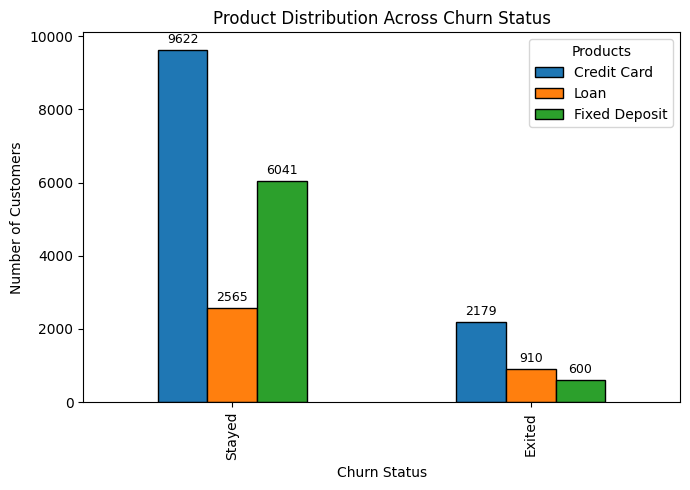

In [284]:
# product distribution ( credit card,loan,Fixed Deposit) vs churn status

crcard = df[df['hascrcard'] == 1].groupby('exited').size()
loan = df[df['hasloan'] == 1].groupby('exited').size()
fd = df[df['hasfd'] == 1].groupby('exited').size()

product_dist = pd.DataFrame({
    'Credit Card': crcard,
    'Loan': loan,
    'Fixed Deposit': fd
}).reset_index()


product_dist['churn_status'] = product_dist['exited'].replace({0: 'Stayed', 1: 'Exited'})


ax = product_dist.set_index('churn_status')[['Credit Card', 'Loan', 'Fixed Deposit']].plot(
    kind='bar', figsize=(7, 5), edgecolor='black'
)


for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)

plt.title('Product Distribution Across Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.legend(title='Products')
plt.tight_layout()
plt.show()


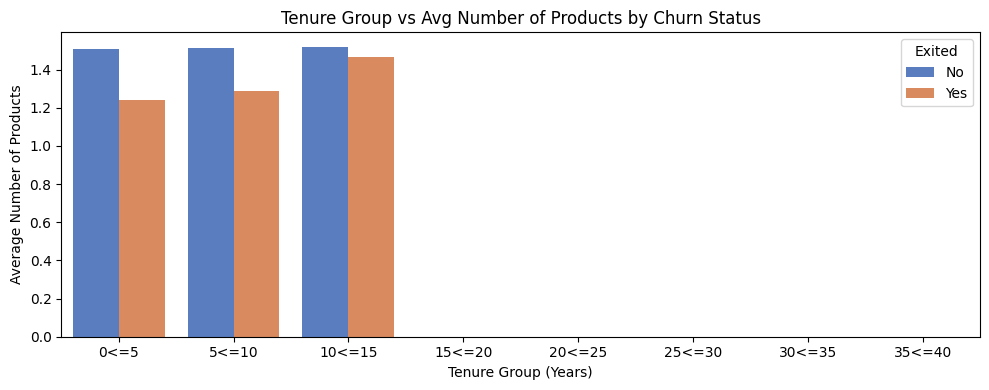

In [296]:
# Average product usage by tenure groups across churn status

tenure_bins = list(range(0, 41, 5))
tenure_labels = [f'{i}<={i+5}' for i in range(0, 36, 5)]

df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)


plt.figure(figsize=(10, 4))
sns.barplot(
    data=df,
    x='tenure_group',
    y='num_of_products',
    hue='exited',
    palette='muted',
    errorbar=None
)
plt.xlabel('Tenure Group (Years)')
plt.ylabel('Average Number of Products')
plt.title('Tenure Group vs Avg Number of Products by Churn Status')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [297]:
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel', 'region', 'employment_type', 'residential_status',
       'income_group', 'loan_status', 'fd_status', 'debt_to_income_ratio',
       'loyalty_score', 'state_avg_complains', 'above_state_avg_complains',
       'high_complainer', 'salary_category', 'age_group', 'tenure_group'],
      dtype='object')

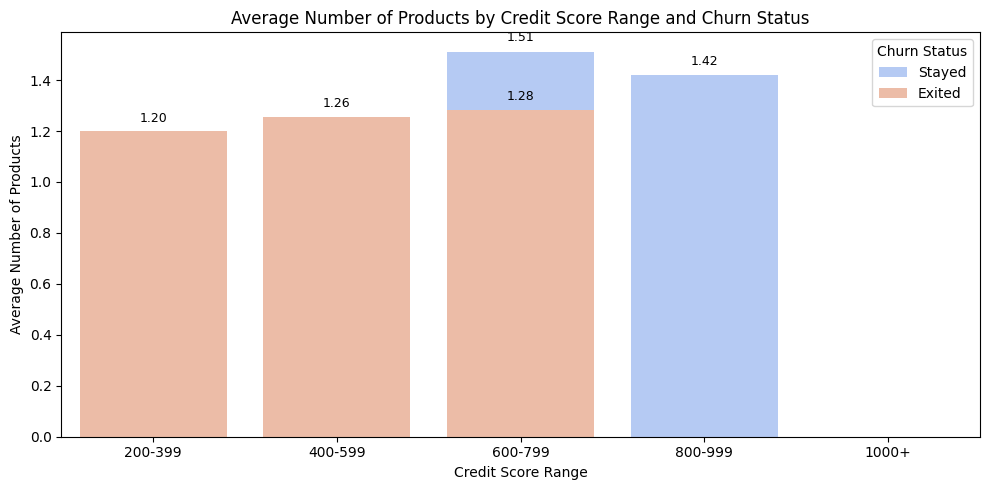

In [302]:
# Average number of products by credit score range and churn status


max_score = df['credit_score'].max()
last_bin = max(1200, max_score + 1)
credit_bins = [200, 400, 600, 800, 1000, last_bin]
credit_labels = ['200-399', '400-599', '600-799', '800-999', '1000+']


df['credit_score_range'] = pd.cut(df['credit_score'], bins=credit_bins, labels=credit_labels, right=False)


df['churn_status'] = df['exited'].replace({0: 'Stayed', 1: 'Exited'})


plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df,
    x='credit_score_range',
    y='num_of_products',
    hue='churn_status',
    palette='coolwarm',
    errorbar=None
)


for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height) and height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + (0.02 * height),
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )


plt.title('Average Number of Products by Credit Score Range and Churn Status')
plt.xlabel('Credit Score Range')
plt.ylabel('Average Number of Products')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()


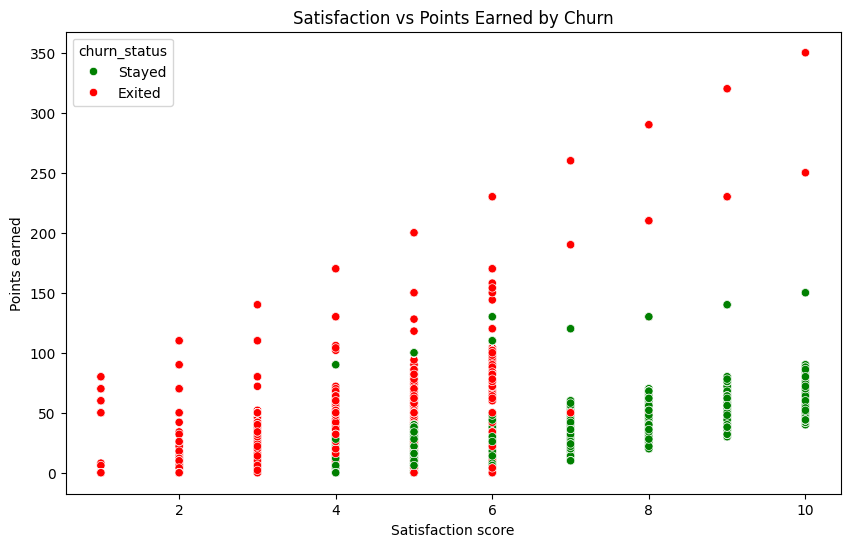

In [305]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df,x='satisfaction_score',y='point_earned',hue='churn_status',palette=['green','red'])

plt.title('Satisfaction vs Points Earned by Churn')
plt.xlabel('Satisfaction score')
plt.ylabel('Points earned')
plt.show()


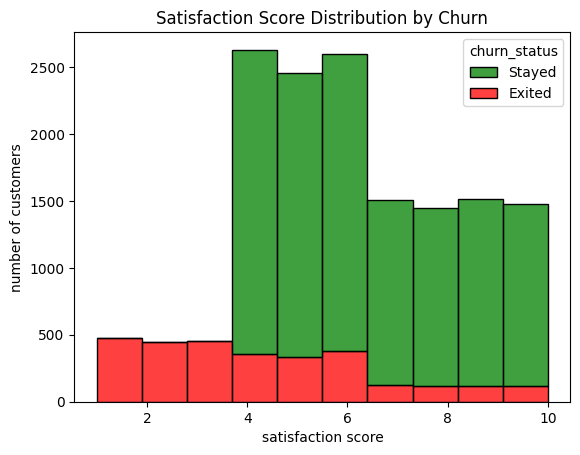

In [307]:
# satisfaction score by churn
sns.histplot(data=df,x='satisfaction_score',hue='churn_status',bins=10,multiple='stack',palette=['green','red'],edgecolor='black',legend=True)
plt.title('Satisfaction Score Distribution by Churn')
plt.xlabel('satisfaction score')
plt.ylabel('number of customers')
plt.show()


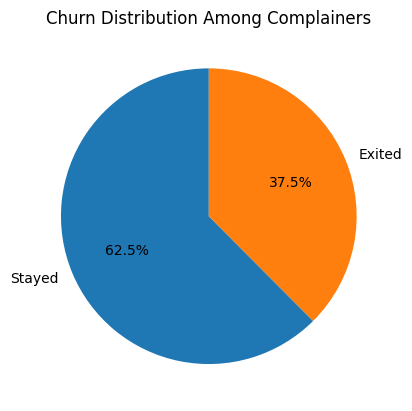

In [308]:
# churn distribution among complainers
complainers=df[df['complain']==1]
churn_among_customer=complainers['churn_status'].value_counts(normalize=True)
plt.pie(churn_among_customer,labels=churn_among_customer.index,autopct='%1.1f%%',startangle=90)
plt.title('Churn Distribution Among Complainers')
plt.show()

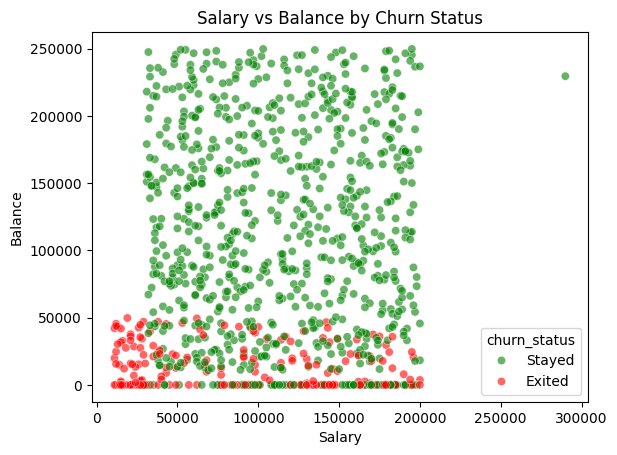

In [310]:
# Salary vs Balance by Churn status

sample_df = df.sample(n=1000, random_state=42)


sns.scatterplot(
    data=sample_df,
    x='salary',
    y='balance',
    hue='churn_status',
    palette=['green','red'],
    alpha=0.6
)


plt.title('Salary vs Balance by Churn Status')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.show()

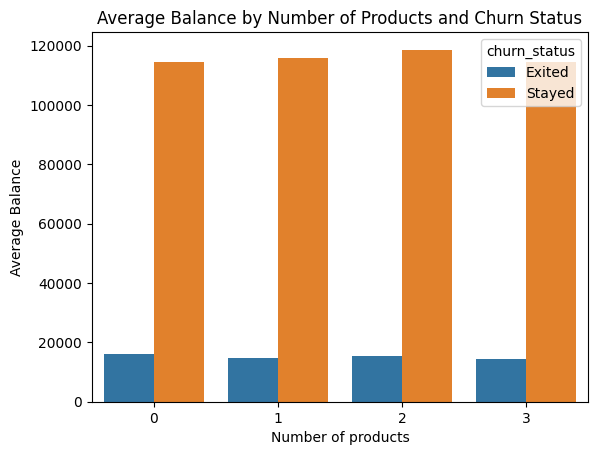

In [312]:
# average balance by number of products and churn status
grouped=df.groupby(['num_of_products','churn_status'])['balance'].mean().reset_index()

sns.barplot(data=grouped,x='num_of_products',y='balance',hue='churn_status')
plt.title('Average Balance by Number of Products and Churn Status')
plt.xlabel('Number of products')
plt.ylabel('Average Balance')
plt.show()

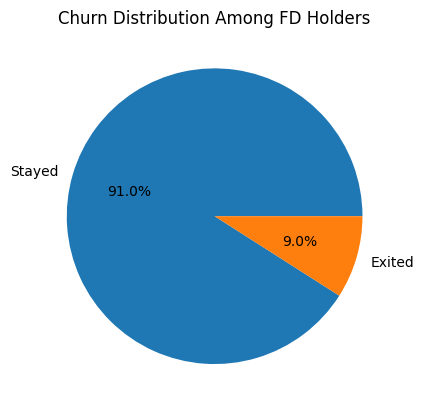

In [313]:
#churn distribution among FD holders
FD_customers=df[df['hasfd']==1]
proportions=FD_customers['churn_status'].value_counts(normalize=True)

plt.pie(proportions,labels=proportions.index,autopct='%1.1f%%')
plt.title('Churn Distribution Among FD Holders')
plt.show()